In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
Data_df = pd.read_csv('Dataset_3_Team_3.csv')

In [6]:
Data2_df = pd.read_csv('Dataset_3_Team_3.csv')

In [7]:
X = Data_df.values
X = X[:,0:2]
Y = Data_df.values
Y = Y[:,2]

In [8]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=42)

In [9]:
from sklearn.svm import SVC
clf_linear = SVC(C = 1,kernel = 'linear',gamma ='auto')

In [10]:
clf_linear.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
clf_linear.score(X_train,y_train)

0.53625

In [12]:
clf_linear.score(X_test,y_test)

0.475

In [25]:
y_pred_train2 = clf_linear.predict(X_train)
y_pred_train2 = y_pred_train2.reshape(1,-1)

In [26]:
cm = np.zeros((2,2))
for i in range(y_train2.shape[1]):
    cm[int(y_pred_train2[0,i]),int(y_train2[0,i])] += 1

In [27]:
cm

array([[178., 149.],
       [222., 251.]])

In [13]:
clf_poly = SVC(C = 10,kernel = 'poly',gamma ='auto',coef0=0.1)#Constant Term in Kernel function is coef 

In [14]:
clf_poly.fit(X_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.1,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
y_pred_train = clf_poly.predict(X_train)
y_pred_train = y_pred_train.reshape(1,-1)

In [16]:
y_train2 = y_train.reshape(1,-1)

In [23]:
cm = np.zeros((2,2))
for i in range(y_train2.shape[1]):
    cm[int(y_pred_train[0,i]),int(y_train2[0,i])] += 1

In [24]:
cm

array([[389.,   5.],
       [ 11., 395.]])

In [18]:
clf_poly.score(X_train,y_train)#Accuray

0.98

In [19]:
clf_poly.score(X_test,y_test)

0.975

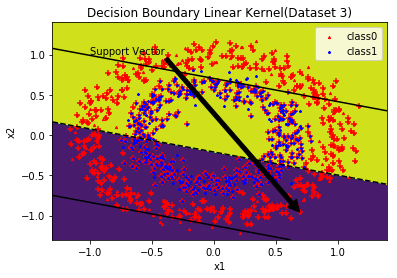

In [20]:
y1 = np.linspace(-1.3,1.4,num = 500) 
y2 = np.linspace(-1.3,1.4,num = 500) 
y1,y2 = np.meshgrid(y1,y2)
Y1 = y1.flatten()
Y2 = y2.flatten()
plot_arr = np.zeros((Y1.shape[0],2))
plot_arr[:,0] += Y1
plot_arr[:,1] += Y2
Z = clf_linear.decision_function(np.c_[y1.ravel(),y2.ravel()])
Z = Z.reshape(np.shape(y1))
plt.contour(y1,y2,Z,levels = [-1,0,1],linestyles = ['solid','dashed','solid'],colors= 'k')
plt.contourf(y1,y2,Z>0,linestyles = ['solid','dashed','solid'])
plt.scatter(clf_linear.support_vectors_[:,0],clf_linear.support_vectors_[:,1], color = 'r',marker='+')
plt.xlabel('x1')
plt.ylabel('x2')
plt.annotate('Support Vector', xy=(clf_linear.support_vectors_[10,0],clf_linear.support_vectors_[10,1]), xytext=(-1, 1),
            arrowprops=dict(facecolor='black', shrink =2.0))
D0 = Data2_df[Data2_df['Class_label']==0].values
D1 = Data2_df[Data2_df['Class_label']==1].values
plt.scatter(D0[:,0],D0[:,1],color="red",s=5,label="class0",marker='^')
plt.scatter(D1[:,0],D1[:,1],color="blue",s=5,label="class1",marker='*')
plt.legend()
plt.title('Decision Boundary Linear Kernel(Dataset 3)')
plt.savefig('SVM_LinerKernal')
plt.show()

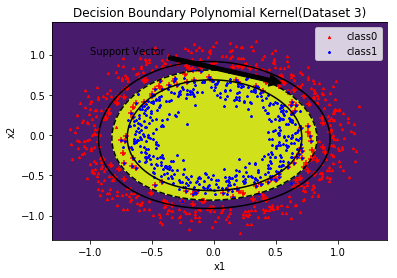

In [21]:
y1 = np.linspace(-1.3,1.4,num = 500) 
y2 = np.linspace(-1.3,1.4,num = 500) 
y1,y2 = np.meshgrid(y1,y2)
Y1 = y1.flatten()
Y2 = y2.flatten()
plot_arr = np.zeros((Y1.shape[0],2))
plot_arr[:,0] += Y1
plot_arr[:,1] += Y2
Z = clf_poly.decision_function(np.c_[y1.ravel(),y2.ravel()])
Z = Z.reshape(np.shape(y1))
plt.contour(y1,y2,Z,levels = [-1,0,1],linestyles = ['solid','dashed','solid'],colors= 'k')
plt.contourf(y1,y2,Z>0,linestyles = ['solid','dashed','solid'])
plt.scatter(clf_poly.support_vectors_[:,0],clf_poly.support_vectors_[:,1], color = 'r',marker='+')
plt.xlabel('x1')
plt.ylabel('x2')
plt.annotate('Support Vector', xy=(clf_poly.support_vectors_[10,0],clf_poly.support_vectors_[10,1]), xytext=(-1, 1),
            arrowprops=dict(facecolor='black', shrink =0.02))
D0 = Data2_df[Data2_df['Class_label']==0].values
D1 = Data2_df[Data2_df['Class_label']==1].values
plt.scatter(D0[:,0],D0[:,1],color="red",s=5,label="class0",marker='^')
plt.scatter(D1[:,0],D1[:,1],color="blue",s=5,label="class1",marker='*')
plt.legend()
plt.title('Decision Boundary Polynomial Kernel(Dataset 3)')
plt.savefig('SVM_PolynomialKernal')
plt.show()